In [1]:
%matplotlib inline 

import matplotlib.pyplot as plt, numpy as np, jdcal
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import griddata
import scipy.ndimage
from matplotlib.gridspec import GridSpec

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

In [184]:
from astropy.io import fits
from astropy.visualization import AsinhStretch, ZScaleInterval, ImageNormalize

import jdcal

horizons = np.genfromtxt('horizons.txt', usecols=(0, 19, 20)).T

In [48]:
# https://gist.github.com/LyleScott/e36e08bfb23b1f87af68c9051f985302

def rotate_via_numpy(xy, radians):
    """Use numpy to build a rotation matrix and take the dot product."""
    x, y = xy
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.dot(j, [x, y])

    return [m[0], m[1]]

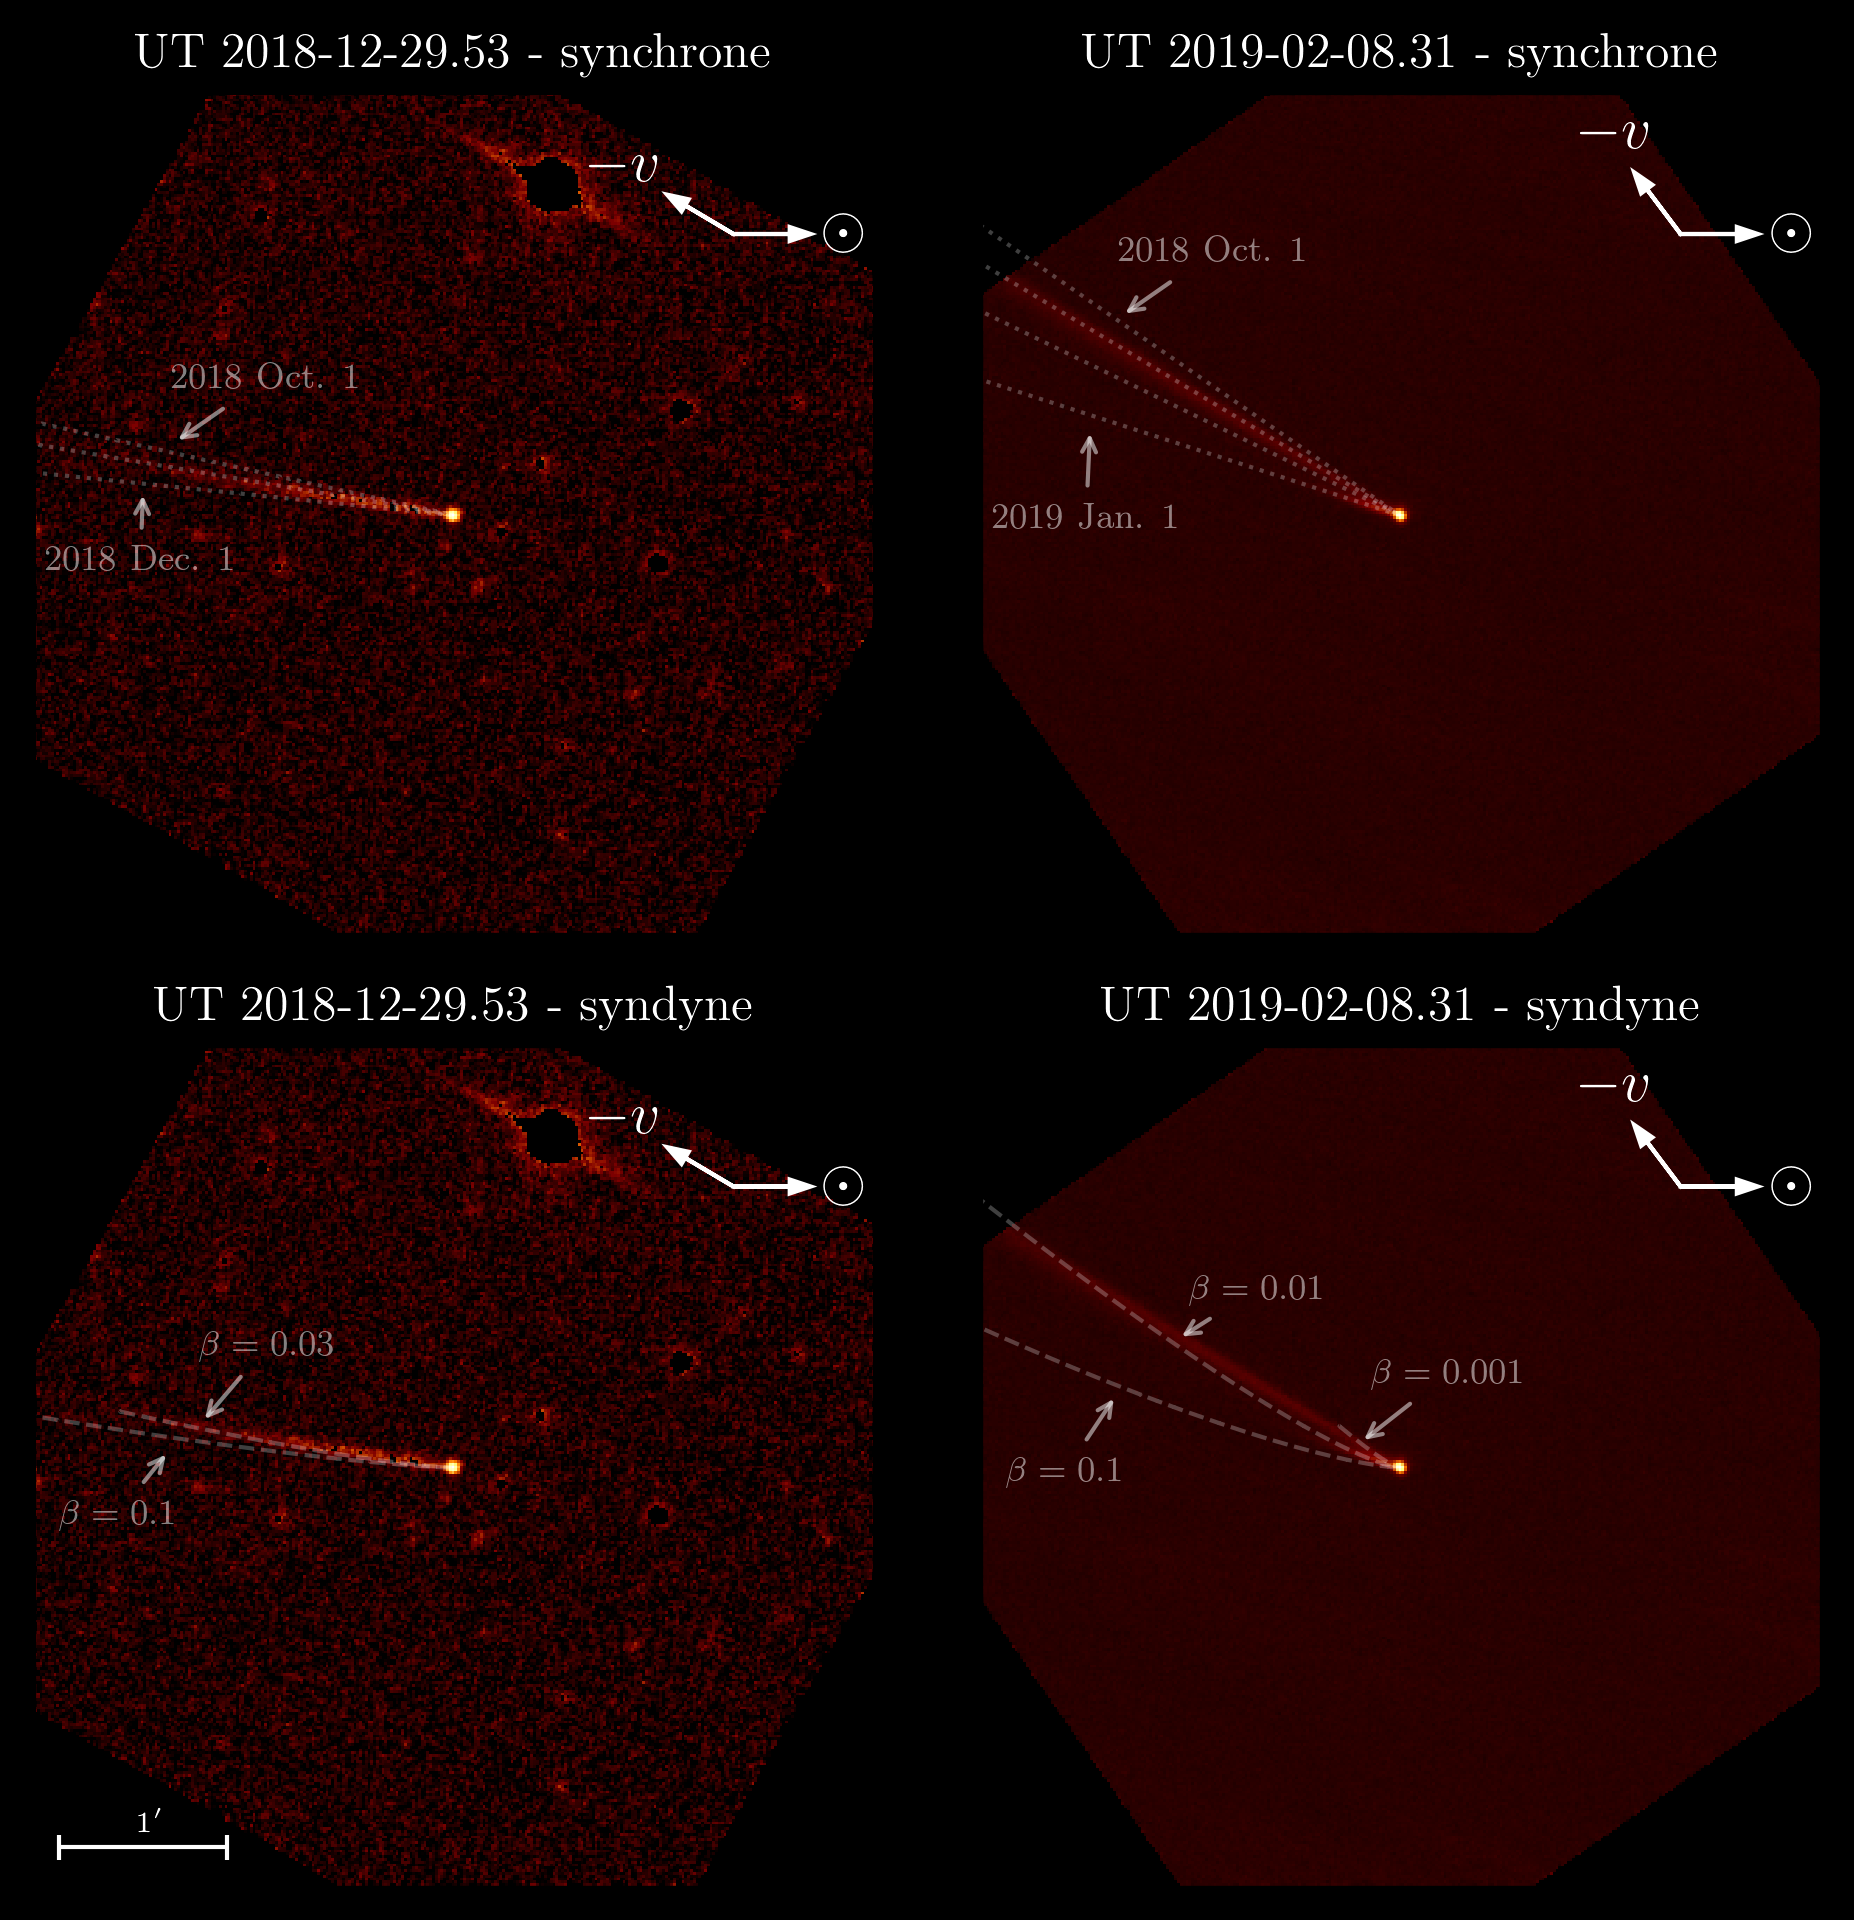

In [194]:
from matplotlib import gridspec

fig = plt.figure(figsize=(6.5, 6.5), dpi=300)
fig.patch.set_facecolor('black')
gs = gridspec.GridSpec(2, 2)

# ========================

ax = fig.add_subplot(gs[0, 0])
    
ax.set_autoscale_on(False)
ax.clear()
ax.set_facecolor('k')
    
cmap = 'afmhot'
hdu_list = fits.open('./stacks/6478-20181229-pre2.488-zr-ztf-stack.fits')
header = hdu_list[0].header
image = hdu_list[1].data
norm = ImageNormalize(image, stretch=AsinhStretch(), vmin=np.nanmean(image)-100, vmax=np.nanmax(image))
    
ax.imshow(image, cmap=cmap, norm=norm, origin='lower', extent=[1, 300, 1, 300])
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
tt = jdcal.jd2gcal(2400000.5, header['OBSJDM']-2400000.5)
ax.set_title('UT ' + str(tt[0]) + '-' + str('%02i' % tt[1]) + '-' + str('%02i' % tt[2]) + '.' + str('%.2f' % tt[3])[2:] \
             + ' - synchrone', color='w')
    
ax.arrow(250, 250, 20, 0, color='w', head_width=5)
ax.text(282, 245, '$\odot$', color='w', fontsize='x-large', weight='black')
    
psang = horizons[1][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
psamv = horizons[2][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
dx = 20*np.cos(np.deg2rad(psang-psamv+180))
dy = -20*np.sin(np.deg2rad(psang-psamv+180))
ax.arrow(250, 250, dx, dy, color='w', head_width=5)
ax.text(250+60*np.cos(np.deg2rad(psang-psamv+180)), 250-40*np.sin(np.deg2rad(psang-psamv+180)), '$-v$', color='w', \
           fontsize='x-large', weight='black')

ax_xlim = ax.get_xlim()
ax_ylim = ax.get_ylim()

for i, ii in enumerate(['20181001', '20181101', '20181201']):
    sync = np.loadtxt('syndyne-synchrone/sync_%s_20181229.int.dat' % ii, usecols=(0, 1)).T
    sync_sort, _ = np.argsort(sync, axis=1)
    sync_x = (sync[0][sync_sort] - sync[0][sync_sort][-1])/header['CDELT1']
    sync_y = (sync[1][sync_sort] - sync[1][sync_sort][-1])/header['CDELT2']

    sync_img_x, sync_img_y = rotate_via_numpy([sync_x, sync_y], np.deg2rad(psang-90))
    ax.plot(np.array(sync_img_x + header['CRPIX1'])[0], np.array(sync_img_y + header['CRPIX2'])[0], 'w:', alpha=0.25, linewidth=1)

ax.set_xlim(ax_xlim)
ax.set_ylim(ax_ylim)

ax.annotate('2018 Oct. 1', xy=(50, 175), xytext=(50, 195), \
            arrowprops=dict(edgecolor='w', facecolor='w', alpha=0.5, arrowstyle='->'), \
            alpha=0.5, color='w', fontsize='small')
ax.annotate('2018 Dec. 1', xy=(40, 160), xytext=(5, 130), \
            arrowprops=dict(edgecolor='w', facecolor='w', alpha=0.5, arrowstyle='->'), \
            alpha=0.5, color='w', fontsize='small')

# ========================

ax = fig.add_subplot(gs[0, 1])
    
ax.set_autoscale_on(False)
ax.clear()
ax.set_facecolor('k')
    
cmap = 'afmhot'
hdu_list = fits.open('./stacks/6478-20190208-pre2.408-zr-ztf-stack.fits')
header = hdu_list[0].header
image = hdu_list[1].data
norm = ImageNormalize(image, stretch=AsinhStretch(), vmin=np.nanmean(image)-150, vmax=np.nanmax(image))
    
ax.imshow(image, cmap=cmap, norm=norm, origin='lower', extent=[1, 300, 1, 300])
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
tt = jdcal.jd2gcal(2400000.5, header['OBSJDM']-2400000.5)
ax.set_title('UT ' + str(tt[0]) + '-' + str('%02i' % tt[1]) + '-' + str('%02i' % tt[2]) + '.' + str('%.2f' % tt[3])[2:]\
             + ' - synchrone', color='w')
    
ax.arrow(250, 250, 20, 0, color='w', head_width=5)
ax.text(282, 245, '$\odot$', color='w', fontsize='x-large', weight='black')
    
psang = horizons[1][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
psamv = horizons[2][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
dx = 20*np.cos(np.deg2rad(psang-psamv+180))
dy = -20*np.sin(np.deg2rad(psang-psamv+180))
ax.arrow(250, 250, dx, dy, color='w', head_width=5)
ax.text(250+60*np.cos(np.deg2rad(psang-psamv+180)), 250-40*np.sin(np.deg2rad(psang-psamv+180)), '$-v$', color='w', \
           fontsize='x-large', weight='black')

ax_xlim = ax.get_xlim()
ax_ylim = ax.get_ylim()

for i, ii in enumerate(['20181001', '20181101', '20181201', '20190101']):
    sync = np.loadtxt('syndyne-synchrone/sync_%s_20190208.int.dat' % ii, usecols=(0, 1)).T
    sync_sort, _ = np.argsort(sync, axis=1)
    sync_x = (sync[0][sync_sort] - sync[0][sync_sort][-1])/header['CDELT1']
    sync_y = (sync[1][sync_sort] - sync[1][sync_sort][-1])/header['CDELT2']

    sync_img_x, sync_img_y = rotate_via_numpy([sync_x, sync_y], np.deg2rad(psang-90))
    ax.plot(np.array(sync_img_x + header['CRPIX1'])[0], np.array(sync_img_y + header['CRPIX2'])[0], 'w:', alpha=0.25, linewidth=1)

ax.set_xlim(ax_xlim)
ax.set_ylim(ax_ylim)

ax.annotate('2018 Oct. 1', xy=(50, 220), xytext=(50, 240), \
            arrowprops=dict(edgecolor='w', facecolor='w', alpha=0.5, arrowstyle='->'), \
            alpha=0.5, color='w', fontsize='small')
ax.annotate('2019 Jan. 1', xy=(40, 182), xytext=(5, 145), \
            arrowprops=dict(edgecolor='w', facecolor='w', alpha=0.5, arrowstyle='->'), \
            alpha=0.5, color='w', fontsize='small')

# ========================

ax = fig.add_subplot(gs[1, 0])
    
ax.set_autoscale_on(False)
ax.clear()
ax.set_facecolor('k')
    
cmap = 'afmhot'
hdu_list = fits.open('./stacks/6478-20181229-pre2.488-zr-ztf-stack.fits')
header = hdu_list[0].header
image = hdu_list[1].data
norm = ImageNormalize(image, stretch=AsinhStretch(), vmin=np.nanmean(image)-100, vmax=np.nanmax(image))
    
ax.imshow(image, cmap=cmap, norm=norm, origin='lower', extent=[1, 300, 1, 300])
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
tt = jdcal.jd2gcal(2400000.5, header['OBSJDM']-2400000.5)
ax.set_title('UT ' + str(tt[0]) + '-' + str('%02i' % tt[1]) + '-' + str('%02i' % tt[2]) + '.' + str('%.2f' % tt[3])[2:] \
             + ' - syndyne', color='w')
    
ax.arrow(250, 250, 20, 0, color='w', head_width=5)
ax.text(282, 245, '$\odot$', color='w', fontsize='x-large', weight='black')
    
psang = horizons[1][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
psamv = horizons[2][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
dx = 20*np.cos(np.deg2rad(psang-psamv+180))
dy = -20*np.sin(np.deg2rad(psang-psamv+180))
ax.arrow(250, 250, dx, dy, color='w', head_width=5)
ax.text(250+60*np.cos(np.deg2rad(psang-psamv+180)), 250-40*np.sin(np.deg2rad(psang-psamv+180)), '$-v$', color='w', \
           fontsize='x-large', weight='black')

ax.errorbar(40, 15, xerr=30, color='w', lw=1, capsize=3)
ax.text(38, 20, r"$1'$", color='w', fontsize='x-small')

ax_xlim = ax.get_xlim()
ax_ylim = ax.get_ylim()

for i, ii in enumerate(['0.1', '0.03']):
    sync = np.loadtxt('syndyne-synchrone/synd_%s_20181229.int.dat' % ii, usecols=(0, 1)).T
    sync_sort, _ = np.argsort(sync, axis=1)
    sync_x = (sync[0][sync_sort] - sync[0][sync_sort][-1])/header['CDELT1']
    sync_y = (sync[1][sync_sort] - sync[1][sync_sort][-1])/header['CDELT2']

    sync_img_x, sync_img_y = rotate_via_numpy([sync_x, sync_y], np.deg2rad(psang-90))
    ax.plot(np.array(sync_img_x + header['CRPIX1'])[0], np.array(sync_img_y + header['CRPIX2'])[0], 'w--', alpha=0.25, linewidth=1)

ax.set_xlim(ax_xlim)
ax.set_ylim(ax_ylim)

ax.annotate(r'$\beta=0.1$', xy=(50, 157), xytext=(10, 130), \
            arrowprops=dict(edgecolor='w', facecolor='w', alpha=0.5, arrowstyle='->'), \
            alpha=0.5, color='w', fontsize='small')
ax.annotate(r'$\beta=0.03$', xy=(60, 165), xytext=(60, 190), \
            arrowprops=dict(edgecolor='w', facecolor='w', alpha=0.5, arrowstyle='->'), \
            alpha=0.5, color='w', fontsize='small')

# ========================

ax = fig.add_subplot(gs[1, 1])
    
ax.set_autoscale_on(False)
ax.clear()
ax.set_facecolor('k')
    
cmap = 'afmhot'
hdu_list = fits.open('./stacks/6478-20190208-pre2.408-zr-ztf-stack.fits')
header = hdu_list[0].header
image = hdu_list[1].data
norm = ImageNormalize(image, stretch=AsinhStretch(), vmin=np.nanmean(image)-150, vmax=np.nanmax(image))
    
ax.imshow(image, cmap=cmap, norm=norm, origin='lower', extent=[1, 300, 1, 300])
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    
tt = jdcal.jd2gcal(2400000.5, header['OBSJDM']-2400000.5)
ax.set_title('UT ' + str(tt[0]) + '-' + str('%02i' % tt[1]) + '-' + str('%02i' % tt[2]) + '.' + str('%.2f' % tt[3])[2:] \
             + ' - syndyne', color='w')
    
ax.arrow(250, 250, 20, 0, color='w', head_width=5)
ax.text(282, 245, '$\odot$', color='w', fontsize='x-large', weight='black')
    
psang = horizons[1][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
psamv = horizons[2][(np.abs(horizons[0]-header['OBSJDM'])).argmin()]
dx = 20*np.cos(np.deg2rad(psang-psamv+180))
dy = -20*np.sin(np.deg2rad(psang-psamv+180))
ax.arrow(250, 250, dx, dy, color='w', head_width=5)
ax.text(250+60*np.cos(np.deg2rad(psang-psamv+180)), 250-40*np.sin(np.deg2rad(psang-psamv+180)), '$-v$', color='w', \
           fontsize='x-large', weight='black')

ax_xlim = ax.get_xlim()
ax_ylim = ax.get_ylim()

for i, ii in enumerate(['0.1', '0.01', '0.001']):
    sync = np.loadtxt('syndyne-synchrone/synd_%s_20190208.int.dat' % ii, usecols=(0, 1)).T
    sync_sort, _ = np.argsort(sync, axis=1)
    sync_x = (sync[0][sync_sort] - sync[0][sync_sort][-1])/header['CDELT1']
    sync_y = (sync[1][sync_sort] - sync[1][sync_sort][-1])/header['CDELT2']

    sync_img_x, sync_img_y = rotate_via_numpy([sync_x, sync_y], np.deg2rad(psang-90))
    ax.plot(np.array(sync_img_x + header['CRPIX1'])[0], np.array(sync_img_y + header['CRPIX2'])[0], 'w--', alpha=0.25, linewidth=1)

ax.set_xlim(ax_xlim)
ax.set_ylim(ax_ylim)

ax.annotate(r'$\beta=0.1$', xy=(50, 177), xytext=(10, 145), \
            arrowprops=dict(edgecolor='w', facecolor='w', alpha=0.5, arrowstyle='->'), \
            alpha=0.5, color='w', fontsize='small')
ax.annotate(r'$\beta=0.01$', xy=(70, 195), xytext=(75, 210), \
            arrowprops=dict(edgecolor='w', facecolor='w', alpha=0.5, arrowstyle='->'), \
            alpha=0.5, color='w', fontsize='small')
ax.annotate(r'$\beta=0.001$', xy=(135, 158), xytext=(140, 180), \
            arrowprops=dict(edgecolor='w', facecolor='w', alpha=0.5, arrowstyle='->'), \
            alpha=0.5, color='w', fontsize='small')

# ========================

fig.tight_layout()
plt.savefig('fp.pdf', facecolor='k')
plt.show()